In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

rest frame Perod and error: [ 71.   0.   0.]


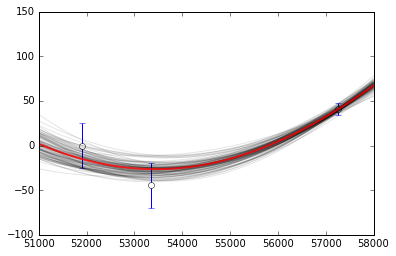

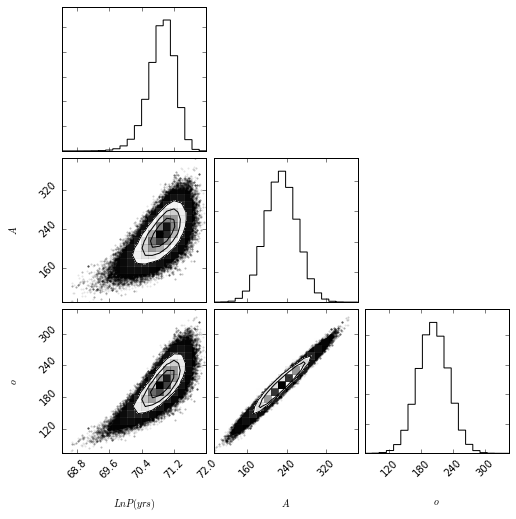

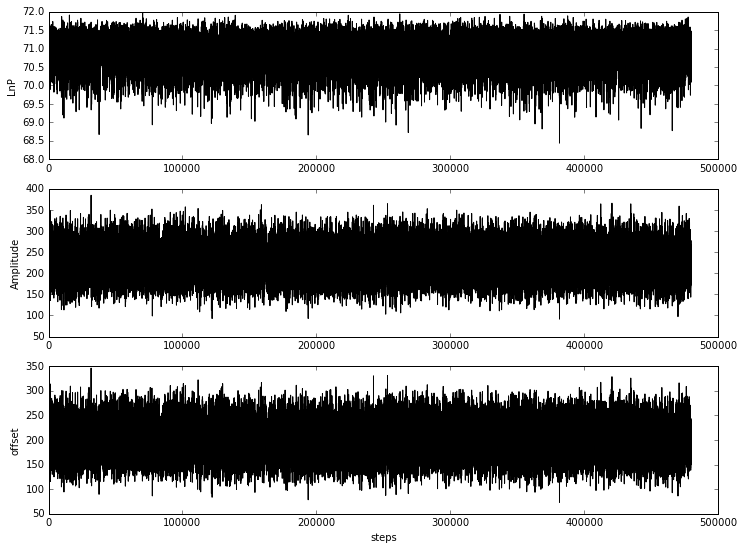

In [10]:
#-----------------P in Log prior and offset in gaussian prior------------
z=0.1854 #redshift
def mcmc(x, y, yerr, lnP0, A0, o0):
    
    def lnprior(theta):
        lnP, A ,o = theta
        if not 9.2 < lnP < 12.9 and 0.< A < 4000. :
            return -np.inf
        
        #gaussian prior on o
        mu = 187
        sigma = 30
        return np.log(1.0/(np.sqrt(2*np.pi)*sigma))-0.5*(o-mu)**2/sigma**2

        return 
    
    # Define the probability function as likelihood * prior.
    
    def lnlike(theta, x, y, yerr):
        lnP, A, o = theta
        
        model = A*np.sin( 2*np.pi*(x)/np.exp(lnP) ) +o
        return -0.5*(np.sum(((y-model)/yerr)**2 - np.log(np.pi*yerr**2)))

    def lnprob(theta, x, y, yerr):
        lp = lnprior(theta)
        if not np.isfinite(lp):
            return -np.inf
        return lp + lnlike(theta, x, y, yerr)

    # Set up the sampler.
    ndim, nwalkers = 3, 10
    pos = [[lnP0, A0, o0] + 1e-4*np.random.rand(ndim) for i in range(nwalkers)]


    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr) )  # change step size  add a=2

    # Clear and run the production chain.
    sampler.run_mcmc(pos, 50000, rstate0=np.random.get_state())  # 50000 is the length of the chain


    # Remove the burn-in part and connect the chains.
    burnin = 2000
    samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))
    return samples


#------------------Main program ---------------------------
#read data
y = np.array([0., -44.36, 40.86])
x=np.array([51901., 53358., 57252.])
yerr=np.array([ 25.06386533, 25.06386533, 6.76371343])
yerr_1sigma=np.array([10.3,10.3, 2.8])  #1 sigma error for fit 
plt.errorbar(x,y,yerr=yerr,fmt='o',mfc='white')
plt.ylim(-100,150)


# run mcmc---------------------------

samples=mcmc(x,y,yerr_1sigma,10.3,200.,187.) # data and initial values 



#plot block-------------------
mjd=np.arange(51000,58000)
for lnP, A, o in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(mjd, A*np.sin((2*np.pi/np.exp(lnP))*(mjd))+o , color="k", alpha=0.1)

# Compute the quantiles.
lnP_mcmc, A_mcmc ,o_mcmc= map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                    zip(*np.percentile(samples, [16, 50, 84],axis=0)))


plt.plot(mjd, A_mcmc[0]*np.sin((2*np.pi/np.exp(lnP_mcmc[0]))*mjd) + o_mcmc[0], color="r", lw=2, alpha=0.8)
samples[:,0] = np.exp(samples[:,0])/365./1.18
fig = corner.corner(samples, labels=["$LnP (yrs)$", "$A$", "$o$"]) 
#plt.savefig('/Users/legolason/Desktop/zzz/1/'+str(i)+'eps')
print 'rest frame Perod and error:', np.round(np.array(np.exp(lnP_mcmc))/365./(1.+z))


#plot chains for three parameters
step=np.arange(0,samples.shape[0])
plt.figure(figsize=(12,9))
plt.subplot(311)
plt.plot(step,samples[:,0],'k')
plt.ylabel('LnP')
plt.subplot(312)
plt.plot(step,samples[:,1],'k')
plt.ylabel('Amplitude')
plt.subplot(313)
plt.plot(step,samples[:,2],'k')
plt.xlabel('steps')
plt.ylabel('offset')

rest frame Perod and error: [ 156.    3.   14.]


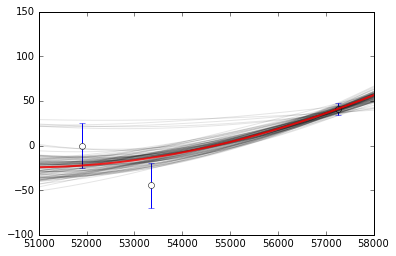

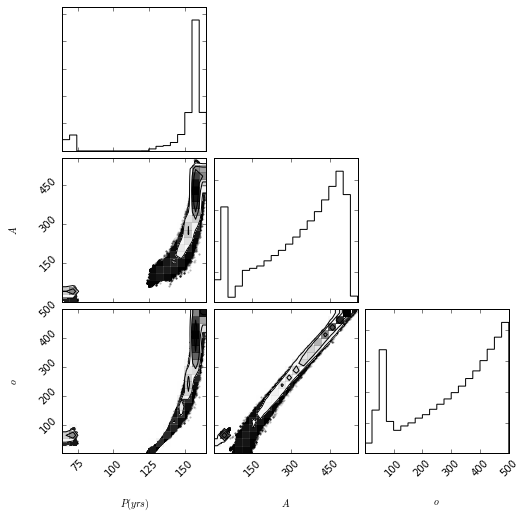

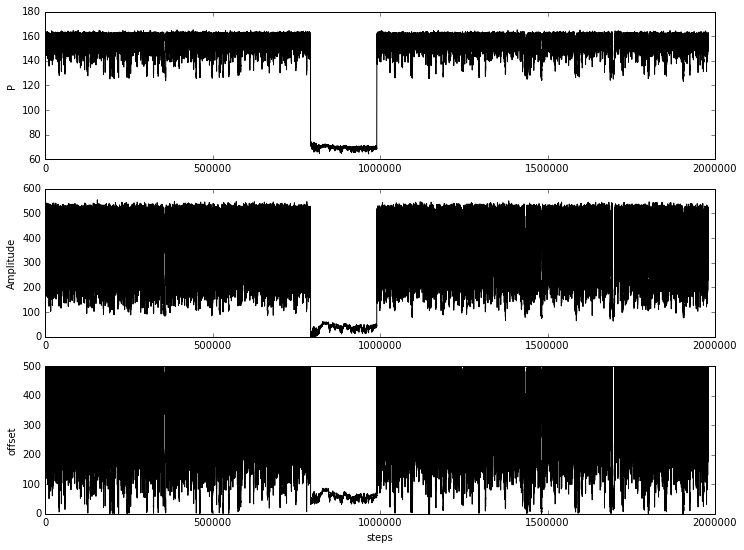

In [8]:
#--------------- all parameters in flat prior-------------
#here  initial P = 39000 days and get P=80 > P=160

def mcmc(x, y, yerr, P0, A0, o0):
    
    def lnprior(theta):
        P, A ,o = theta
        if 10000 < P < 400000 and 0.< A < 4000. and  0 < o < 500:
            return 0.
        return -np.inf
    
    # Define the probability function as likelihood * prior.
    
    def lnlike(theta, x, y, yerr):
        P, A, o = theta
        
        model = A*np.sin( 2*np.pi*(x)/P ) +o
        return -0.5*(np.sum(((y-model)/yerr)**2 - np.log(np.pi*yerr**2)))

    def lnprob(theta, x, y, yerr):
        lp = lnprior(theta)
        if not np.isfinite(lp):
            return -np.inf
        return lp + lnlike(theta, x, y, yerr)

    # Set up the sampler.
    ndim, nwalkers = 3, 10
    pos = [[P0, A0, o0] + 1e-4*np.random.rand(ndim) for i in range(nwalkers)]


    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))

    # Clear and run the production chain.
    sampler.run_mcmc(pos, 200000, rstate0=np.random.get_state())


    # Remove the burn-in part and connect the chains.
    burnin = 2000
    samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))
    return samples


#------------------Main program ---------------------------
#read data

y = np.array([0., -44.36, 40.86])
x=np.array([51901., 53358., 57252.])
yerr=np.array([ 25.06386533, 25.06386533, 6.76371343])
yerr_1sigma=np.array([10.3,10.3, 2.8])  #1 sigma error for fit 
plt.errorbar(x,y,yerr=yerr,fmt='o',mfc='white')
plt.ylim(-100,150)


# run mcmc---------------------------

samples=mcmc(x,y,yerr_1sigma,39000,400.,500.) # data and initial values 


#plot block-------------------
mjd=np.arange(51000,58000)

for P, A, o in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(mjd, A*np.sin((2*np.pi/P)*(mjd))+o , color="k", alpha=0.1)

# Compute the quantiles.
P_mcmc, A_mcmc ,o_mcmc= map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                    zip(*np.percentile(samples, [16, 50, 84],axis=0)))


plt.plot(mjd, A_mcmc[0]*np.sin((2*np.pi/P_mcmc[0])*mjd) + o_mcmc[0], color="r", lw=2, alpha=0.8)
samples[:,0] = samples[:,0]/365./1.18
fig = corner.corner(samples, labels=["$P (yrs)$", "$A$", "$o$"]) 

print 'rest frame Perod and error:', np.round(np.array(P_mcmc)/365./(1.+z))


#plot chains for three parameters
step=np.arange(0,samples.shape[0])
plt.figure(figsize=(12,9))
plt.subplot(311)
plt.plot(step,samples[:,0],'k')
plt.ylabel('P')
plt.subplot(312)
plt.plot(step,samples[:,1],'k')
plt.ylabel('Amplitude')
plt.subplot(313)
plt.plot(step,samples[:,2],'k')
plt.xlabel('steps')
plt.ylabel('offset')

rest frame Perod and error: [ 71.   0.   0.]


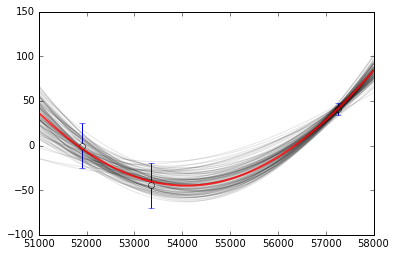

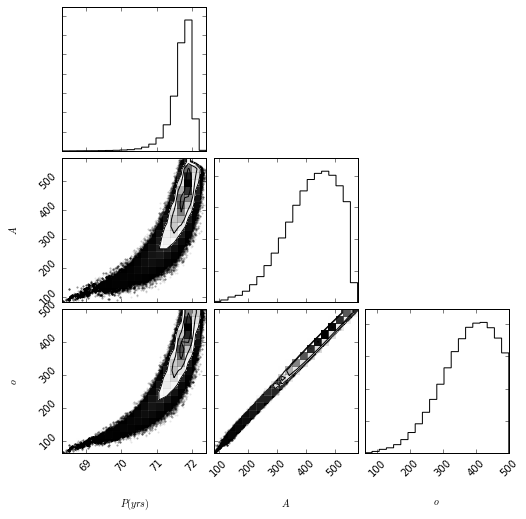

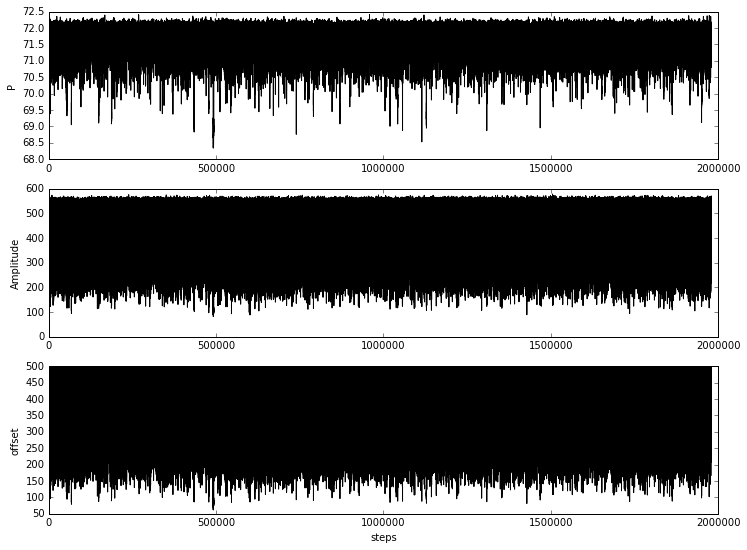

In [9]:
# compare to last code, the only difference is the initial P change to 40000
# but get posterior P=160 > P=80

def mcmc(x, y, yerr, P0, A0, o0):
    
    def lnprior(theta):
        P, A ,o = theta
        if 10000 < P < 400000 and 0.< A < 4000. and  0 < o < 500:
            return 0.
        return -np.inf
    
    # Define the probability function as likelihood * prior.
    
    def lnlike(theta, x, y, yerr):
        P, A, o = theta
        
        model = A*np.sin( 2*np.pi*(x)/P ) +o
        return -0.5*(np.sum(((y-model)/yerr)**2 - np.log(np.pi*yerr**2)))

    def lnprob(theta, x, y, yerr):
        lp = lnprior(theta)
        if not np.isfinite(lp):
            return -np.inf
        return lp + lnlike(theta, x, y, yerr)

    # Set up the sampler.
    ndim, nwalkers = 3, 10
    pos = [[P0, A0, o0] + 1e-4*np.random.rand(ndim) for i in range(nwalkers)]


    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))

    # Clear and run the production chain.
    sampler.run_mcmc(pos, 200000, rstate0=np.random.get_state())


    # Remove the burn-in part and connect the chains.
    burnin = 2000
    samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))
    return samples


#------------------Main program ---------------------------
#read data
z=0.1854 #redshift
y = np.array([0., -44.36, 40.86])
x=np.array([51901., 53358., 57252.])
yerr=np.array([ 25.06386533, 25.06386533, 6.76371343])
yerr_1sigma=np.array([10.3,10.3, 2.8])  #1 sigma error for fit 
plt.errorbar(x,y,yerr=yerr,fmt='o',mfc='white')
plt.ylim(-100,150)


# run mcmc---------------------------

samples=mcmc(x,y,yerr_1sigma,40000,400.,500.) # data and initial values 


#plot block-------------------
mjd=np.arange(51000,58000)

for P, A, o in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(mjd, A*np.sin((2*np.pi/P)*(mjd))+o , color="k", alpha=0.1)

# Compute the quantiles.
P_mcmc, A_mcmc ,o_mcmc= map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                    zip(*np.percentile(samples, [16, 50, 84],axis=0)))


plt.plot(mjd, A_mcmc[0]*np.sin((2*np.pi/P_mcmc[0])*mjd) + o_mcmc[0], color="r", lw=2, alpha=0.8)
samples[:,0] = samples[:,0]/365./1.18
fig = corner.corner(samples, labels=["$P (yrs)$", "$A$", "$o$"]) 

print 'rest frame Perod and error:', np.round(np.array(P_mcmc)/365./(1.+z))


#plot chains for three parameters
step=np.arange(0,samples.shape[0])
plt.figure(figsize=(12,9))
plt.subplot(311)
plt.plot(step,samples[:,0],'k')
plt.ylabel('P')
plt.subplot(312)
plt.plot(step,samples[:,1],'k')
plt.ylabel('Amplitude')
plt.subplot(313)
plt.plot(step,samples[:,2],'k')
plt.xlabel('steps')
plt.ylabel('offset')


rest frame Perod and error: [ 150.    0.    0.]


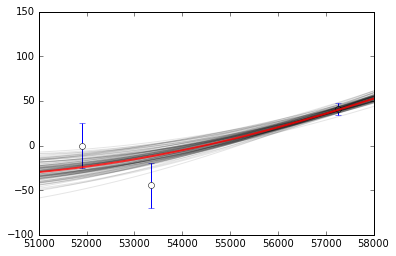

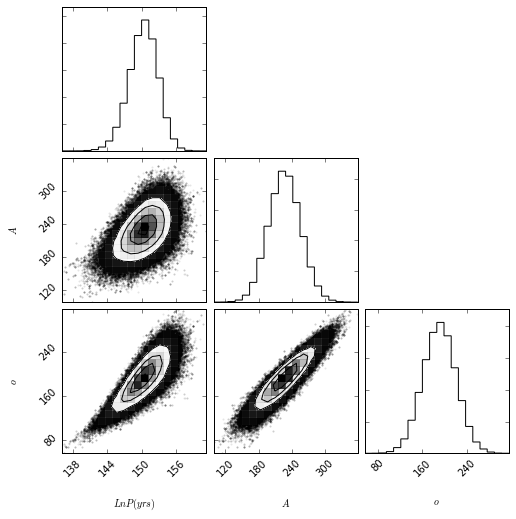

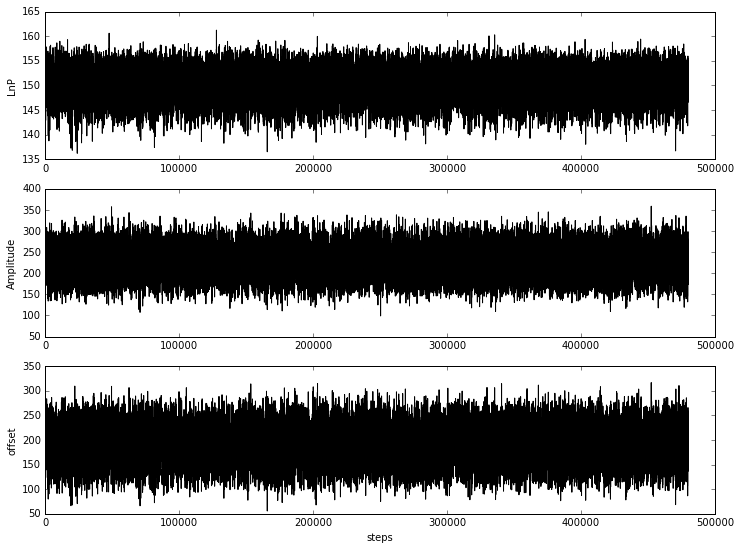

In [11]:
#-----------------P in Log prior and offset in gaussian prior------------
z=0.1854 #redshift
def mcmc(x, y, yerr, lnP0, A0, o0):
    
    def lnprior(theta):
        lnP, A ,o = theta
        if not 9.2 < lnP < 12.9 and 0.< A < 4000. :
            return -np.inf
        
        #gaussian prior on o
        mu = 187
        sigma = 30
        return np.log(1.0/(np.sqrt(2*np.pi)*sigma))-0.5*(o-mu)**2/sigma**2

        return 
    
    # Define the probability function as likelihood * prior.
    
    def lnlike(theta, x, y, yerr):
        lnP, A, o = theta
        
        model = A*np.sin( 2*np.pi*(x)/np.exp(lnP) ) +o
        return -0.5*(np.sum(((y-model)/yerr)**2 - np.log(np.pi*yerr**2)))

    def lnprob(theta, x, y, yerr):
        lp = lnprior(theta)
        if not np.isfinite(lp):
            return -np.inf
        return lp + lnlike(theta, x, y, yerr)

    # Set up the sampler.
    ndim, nwalkers = 3, 10
    pos = [[lnP0, A0, o0] + 1e-4*np.random.rand(ndim) for i in range(nwalkers)]


    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr) )  # change step size  add a=2

    # Clear and run the production chain.
    sampler.run_mcmc(pos, 50000, rstate0=np.random.get_state())  # 50000 is the length of the chain


    # Remove the burn-in part and connect the chains.
    burnin = 2000
    samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))
    return samples


#------------------Main program ---------------------------
#read data
y = np.array([0., -44.36, 40.86])
x=np.array([51901., 53358., 57252.])
yerr=np.array([ 25.06386533, 25.06386533, 6.76371343])
yerr_1sigma=np.array([10.3,10.3, 2.8])  #1 sigma error for fit 
plt.errorbar(x,y,yerr=yerr,fmt='o',mfc='white')
plt.ylim(-100,150)


# run mcmc---------------------------

samples=mcmc(x,y,yerr_1sigma,11,200.,187.) # data and initial values 



#plot block-------------------
mjd=np.arange(51000,58000)
for lnP, A, o in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(mjd, A*np.sin((2*np.pi/np.exp(lnP))*(mjd))+o , color="k", alpha=0.1)

# Compute the quantiles.
lnP_mcmc, A_mcmc ,o_mcmc= map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                    zip(*np.percentile(samples, [16, 50, 84],axis=0)))


plt.plot(mjd, A_mcmc[0]*np.sin((2*np.pi/np.exp(lnP_mcmc[0]))*mjd) + o_mcmc[0], color="r", lw=2, alpha=0.8)
samples[:,0] = np.exp(samples[:,0])/365./1.18
fig = corner.corner(samples, labels=["$LnP (yrs)$", "$A$", "$o$"]) 
#plt.savefig('/Users/legolason/Desktop/zzz/1/'+str(i)+'eps')
print 'rest frame Perod and error:', np.round(np.array(np.exp(lnP_mcmc))/365./(1.+z))


#plot chains for three parameters
step=np.arange(0,samples.shape[0])
plt.figure(figsize=(12,9))
plt.subplot(311)
plt.plot(step,samples[:,0],'k')
plt.ylabel('LnP')
plt.subplot(312)
plt.plot(step,samples[:,1],'k')
plt.ylabel('Amplitude')
plt.subplot(313)
plt.plot(step,samples[:,2],'k')
plt.xlabel('steps')
plt.ylabel('offset')